**Working with Multi-Class Classification**
* Dataset: Tensorflow fashion mnist dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [4]:
# Visualizing an item
def plot_data(index_choice):
    plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
    plt.title(class_names[train_label[index_choice]])
    plt.show()

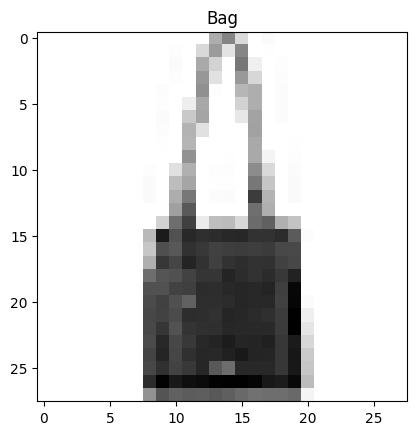

In [5]:
plot_data(200)

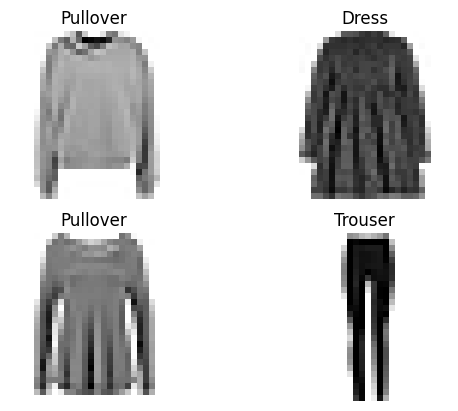

In [6]:
# Visualizing multiple item
import random
plt.Figure=(8,8)
for i in range(4):
    ax =plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.title(class_names[train_label[rand_index]])
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)

In [7]:
train_data[0].shape

(28, 28)

Building a basic model multi-label classification

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.fit(
    train_data,
    train_label,
    epochs=10,
    validation_data = (test_data,test_label)
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0993 - loss: 2.7395 - val_accuracy: 0.1001 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1019 - loss: 2.3028 - val_accuracy: 0.0997 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0988 - loss: 2.3027 - val_accuracy: 0.0999 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1012 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0994 - loss: 2.3028 - 

**Doing feature scaling to see to how it will affect the accuracy**
* scaling
* normalization

In [9]:
train_data.min(), train_data.max()

(0, 255)

In [10]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [11]:
train_data_norm.min(),  train_data_norm.max()

(0.0, 1.0)

In [12]:
# new model defination
model_norm = tf.keras.Sequential()
model_norm.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_norm.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = 'adam',
    metrics = ['accuracy']
)

# model training
history_norm = model_norm.fit(
    train_data_norm,
    train_label,
    epochs=10,
    validation_data = (test_data_norm,test_label)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4921 - loss: 1.3559 - val_accuracy: 0.7707 - val_loss: 0.6692
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7853 - loss: 0.6326 - val_accuracy: 0.7896 - val_loss: 0.6163
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8025 - loss: 0.5801 - val_accuracy: 0.8015 - val_loss: 0.5850
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8106 - loss: 0.5515 - val_accuracy: 0.8080 - val_loss: 0.5716
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8158 - loss: 0.5395 - val_accuracy: 0.8066 - val_loss: 0.5690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8160 - loss: 0.5340 - val_accuracy: 0.8045 - val_loss: 0.5642
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8214 - loss: 0.5247 - val_accuracy: 0.8110 - val_loss: 0.5578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8198 - loss: 0.5240 -

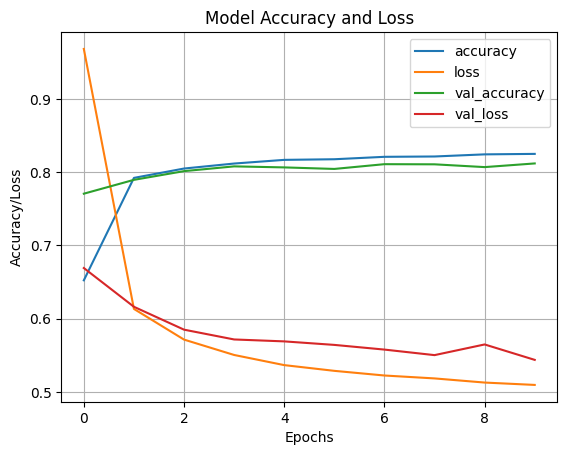

In [13]:
# visualising the loss curves

pd.DataFrame(history_norm.history).plot()
plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.grid(True)

Finding the ideal learning rate
* Learning rate scheduler

In [14]:
# new model defination
model_norm_2 = tf.keras.Sequential()
model_norm_2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_norm_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_2.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model_norm_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.003),
    metrics = ['accuracy']
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
# model training
history_norm_2 = model_norm_2.fit(
    train_data_norm,
    train_label,
    epochs=50,
    validation_data = (test_data_norm,test_label),
    callbacks=[lr_scheduler]
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.2660 - loss: 2.1042 - val_accuracy: 0.4248 - val_loss: 1.7136 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4439 - loss: 1.6250 - val_accuracy: 0.4722 - val_loss: 1.4559 - learning_rate: 1.1220e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4890 - loss: 1.3989 - val_accuracy: 0.5264 - val_loss: 1.2864 - learning_rate: 1.2589e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5395 - loss: 1.2393 - val_accuracy: 0.5844 - val_loss: 1.1746 - learning_rate: 1.4125e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5975 - loss: 1.1395 - val_accuracy: 0.6022 - val_loss: 1.1030 - learning_rate: 1.5849e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6186 - loss: 1.0674 - val_accuracy: 0.6263 - val_loss: 1.0430 - learning_rate: 1.7783e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/st

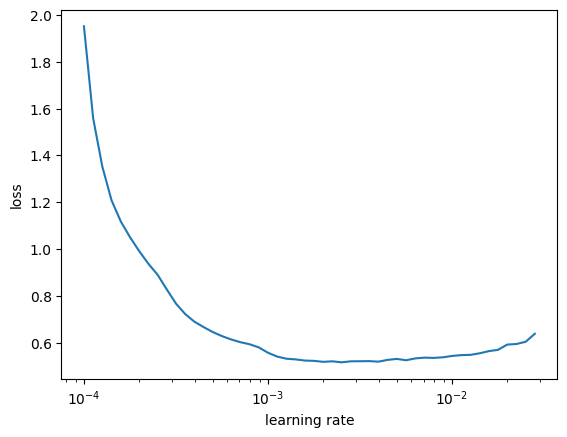

In [15]:
# visualising the learning rate
lrs = 1e-4*10**(tf.range(50)/20)
plt.semilogx(lrs, history_norm_2.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')

plt.show()

In [ ]:
# new model defination
model_norm_3 = tf.keras.Sequential()
model_norm_3.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_norm_3.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_3.add(tf.keras.layers.Dense(4, activation='relu'))
model_norm_3.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model_norm_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.003),
    metrics = ['accuracy']
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
# model training
history_norm_3 = model_norm_2.fit(
    train_data_norm,
    train_label,
    epochs=50,
    validation_data = (test_data_norm,test_label),
    callbacks=[lr_scheduler]
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8184 - loss: 0.5281 - val_accuracy: 0.8106 - val_loss: 0.5491 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8295 - loss: 0.4947 - val_accuracy: 0.8157 - val_loss: 0.5408 - learning_rate: 1.1220e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8328 - loss: 0.4874 - val_accuracy: 0.8170 - val_loss: 0.5355 - learning_rate: 1.2589e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8342 - loss: 0.4823 - val_accuracy: 0.8184 - val_loss: 0.5322 - learning_rate: 1.4125e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8344 - loss: 0.4725 - val_accuracy: 0.8194 - val_loss: 0.5300 - learning_rate: 1.5849e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8357 - loss: 0.4754 - val_accuracy: 0.8208 - val_loss: 0.5294 - learning_rate: 1.7783e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/st